In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from utils.utils import generate_synthetic_data, generate_final_features, split_dataset
import warnings 
warnings.filterwarnings("ignore")

In [96]:
irregular_cycle_data = pd.read_csv('dataset/irregular_cycle_data.csv')
features_irregular_cycle_data, labels_irregular_cycle_data = generate_final_features(irregular_cycle_data)
input_train_irregular_cycle, input_test_irregular_cycle, output_train_irregular_cycle, output_test_irregular_cycle = split_dataset(features_irregular_cycle_data, labels_irregular_cycle_data, reshape=False)


In [98]:
n_features = input_train_irregular_cycle.shape[2]
# model LSTM with 4 layers
model = Sequential()
model.add(LSTM(256, activation='sigmoid', return_sequences=True, input_shape=(input_train_irregular_cycle.shape[1], n_features)))
model.add(Dropout(0.5))
model.add(LSTM(128, activation='sigmoid', return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=n_features, activation='relu'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 3, 256)            265216    
                                                                 
 dropout_12 (Dropout)        (None, 3, 256)            0         
                                                                 
 lstm_13 (LSTM)              (None, 3, 128)            197120    
                                                                 
 dropout_13 (Dropout)        (None, 3, 128)            0         
                                                                 
 lstm_14 (LSTM)              (None, 32)                20608     
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 2)                

In [99]:
opt=tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='mean_squared_error', optimizer=opt)
# add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience=20, restore_best_weights=True)

In [100]:
history = model.fit(input_train_irregular_cycle, output_train_irregular_cycle, epochs=2000, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 [==============================] - 5s 5s/step - loss: 786.3062 - val_loss: 487.2583
Epoch 2/2000
1/1 [==============================] - 0s 67ms/step - loss: 660.3932 - val_loss: 459.3894
Epoch 3/2000
1/1 [==============================] - 0s 65ms/step - loss: 626.8013 - val_loss: 436.4312
Epoch 4/2000
1/1 [==============================] - 0s 58ms/step - loss: 583.6603 - val_loss: 413.9619
Epoch 5/2000
1/1 [==============================] - 0s 50ms/step - loss: 568.9684 - val_loss: 392.6320
Epoch 6/2000
1/1 [==============================] - 0s 45ms/step - loss: 562.5474 - val_loss: 372.1975
Epoch 7/2000
1/1 [==============================] - 0s 45ms/step - loss: 516.6375 - val_loss: 352.4626
Epoch 8/2000
1/1 [==============================] - 0s 44ms/step - loss: 507.5977 - val_loss: 333.3193
Epoch 9/2000
1/1 [==============================] - 0s 45ms/step - loss: 486.9979 - val_loss: 314.6469
Epoch 10/2000
1/1 [==============================] - 0s 49ms/step - loss: 4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


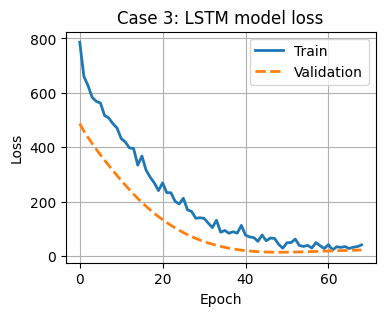

In [120]:
# plot the loss and val loss
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'], '-', linewidth=2)
plt.plot(history.history['val_loss'], '--', linewidth=2)
plt.grid(True)
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Case 3: LSTM model loss')
# save figure 
fig = plt.gcf()
fig.savefig('case3_loss_lstm.eps', dpi=300, bbox_inches='tight')


In [111]:
# make predictions
trainPredict = model.predict(input_train_irregular_cycle)
testPredict = model.predict(input_test_irregular_cycle)
testPredict = np.round(testPredict)

1/1 [==============================] - 0s 17ms/step


In [113]:
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(output_test_irregular_cycle, testPredict))
print('Test Score: %.2f RMSE' % np.srqt(testScore))

# calculate mean absolute error
testScore = mean_absolute_error(output_test_irregular_cycle, testPredict)
print('Test Score: %.2f MAE' % (testScore))

# calculate r2 score
testScore = r2_score(output_test_irregular_cycle, testPredict)
print('Test Score: %.2f R2' % (testScore))




Test Score: 4.29 RMSE
Test Score: 3.40 MAE
Test Score: -0.93 R2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


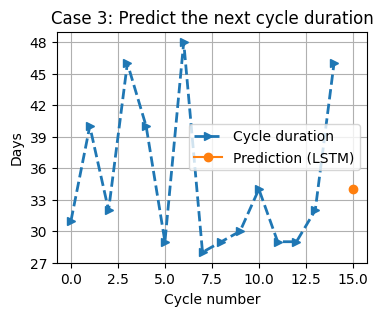

In [118]:
# plot baseline and predictions
plt.figure(figsize=(4, 3))
plt.plot(input_test_irregular_cycle[:,:,0].reshape(-1,1), '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),testPredict[0,0], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylabel('Days')
plt.xlabel('Cycle number')
plt.legend(['Cycle duration', 'Prediction (LSTM)'])
plt.title('Case 3: Predict the next cycle duration')
plt.grid(True)

# save figure
fig = plt.gcf()
fig.savefig('case3_prediction_lstm.eps', dpi=300, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


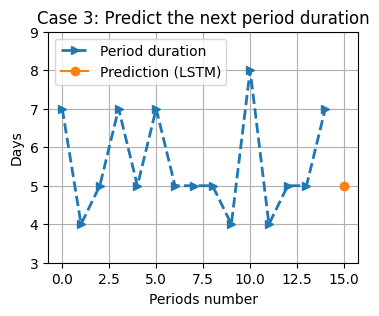

In [119]:
plt.figure(figsize=(4, 3))
plt.plot(input_test_irregular_cycle[:,:,1].reshape(-1,1), '-->', linewidth=2.0)
#plt.plot(np.arange(5),output_test_irregular_cycle[:,1], '-->', linewidth=2.0)
plt.plot(np.arange(15, 16),testPredict[0,1], '-o')
# round the number in axis
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
#set the y axis range
plt.ylim(3, 9)
plt.ylabel('Days')
plt.xlabel('Periods number')
plt.legend(['Period duration', 'Prediction (LSTM)'])
plt.title('Case 3: Predict the next period duration')
plt.grid(True)

# save figure
fig = plt.gcf()
fig.savefig('case3_prediction_lstm_period.eps', dpi=300, bbox_inches='tight')

In [121]:
model.save('case3_lstm.h5')

: 